In [1]:
# !pip install lazypredict

In [2]:
import pandas as pd
url = 'https://raw.githubusercontent.com/lisb020/scifi_book_game/main/BookList.csv'
pd_df = pd.read_csv(url)

pd_df.head()

,Unnamed: 0,Book_Title,Rating_score,Rating_votes,Book_Description,subgenre
0,0,Obsidian,4.17,236780,Starting over sucks When we moved to West Virg...,sf_aliens
1,1,Onyx,4.27,153429,BEING CONNECTED TO DAEMON BLACK SUCKS… Thanks ...,sf_aliens
2,2,The 5th Wave,4.03,400600,After the 1st wave only darkness remains Aft...,sf_aliens
3,3,The Host,3.84,915026,Melanie Stryder refuses to fade away The eart...,sf_aliens
4,5,Origin,4.35,93979,Daemon will do anything to get Katy back After...,sf_aliens


In [3]:
pd_df.drop(columns="Unnamed: 0", inplace=True)
pd_df.head()

,Book_Title,Rating_score,Rating_votes,Book_Description,subgenre
0,Obsidian,4.17,236780,Starting over sucks When we moved to West Virg...,sf_aliens
1,Onyx,4.27,153429,BEING CONNECTED TO DAEMON BLACK SUCKS… Thanks ...,sf_aliens
2,The 5th Wave,4.03,400600,After the 1st wave only darkness remains Aft...,sf_aliens
3,The Host,3.84,915026,Melanie Stryder refuses to fade away The eart...,sf_aliens
4,Origin,4.35,93979,Daemon will do anything to get Katy back After...,sf_aliens


In [4]:
import re
def  clean_text(df, text_field, new_text_field_name):
    df[new_text_field_name] = df[text_field].str.lower()
    df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", str(elem)))  
    # remove numbers
    df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"\d+", "", elem))
    
    return df
data_clean = clean_text(pd_df, 'Book_Description', 'text_clean')
data_clean.head()

,Book_Title,Rating_score,Rating_votes,Book_Description,subgenre,text_clean
0,Obsidian,4.17,236780,Starting over sucks When we moved to West Virg...,sf_aliens,starting over sucks when we moved to west virg...
1,Onyx,4.27,153429,BEING CONNECTED TO DAEMON BLACK SUCKS… Thanks ...,sf_aliens,being connected to daemon black sucks thanks t...
2,The 5th Wave,4.03,400600,After the 1st wave only darkness remains Aft...,sf_aliens,after the st wave only darkness remains afte...
3,The Host,3.84,915026,Melanie Stryder refuses to fade away The eart...,sf_aliens,melanie stryder refuses to fade away the eart...
4,Origin,4.35,93979,Daemon will do anything to get Katy back After...,sf_aliens,daemon will do anything to get katy back after...


In [5]:
import nltk.corpus
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
data_clean['text_clean'] = data_clean['text_clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
data_clean.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jaime\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Book_Title,Rating_score,Rating_votes,Book_Description,subgenre,text_clean
0,Obsidian,4.17,236780,Starting over sucks When we moved to West Virg...,sf_aliens,starting sucks moved west virginia right senio...
1,Onyx,4.27,153429,BEING CONNECTED TO DAEMON BLACK SUCKS… Thanks ...,sf_aliens,connected daemon black sucks thanks alien mojo...
2,The 5th Wave,4.03,400600,After the 1st wave only darkness remains Aft...,sf_aliens,st wave darkness remains nd lucky escape rd un...
3,The Host,3.84,915026,Melanie Stryder refuses to fade away The eart...,sf_aliens,melanie stryder refuses fade away earth invade...
4,Origin,4.35,93979,Daemon will do anything to get Katy back After...,sf_aliens,daemon anything get katy back successful disas...


In [6]:
def remove_nums(row):
  output = ''.join(c for c in str(row['text_clean']) if not c.isdigit())
  return(output)

data_clean['text_clean'] = data_clean.apply (lambda row: remove_nums(row), axis=1)

In [7]:
def remove_multi_spaces(row):
  single_spaces = " ".join(str(row['text_clean']).split())
  return(single_spaces)

data_clean['text_clean'] = data_clean.apply (lambda row: remove_multi_spaces(row), axis=1)

In [8]:
def remove_unicode(row):
  string_encode = str(row['text_clean']).encode("ascii", "ignore")
  return(string_encode.decode())

data_clean['text_clean'] = data_clean.apply (lambda row: remove_unicode(row), axis=1)

In [9]:
import nltk 
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
data_clean['text_tokens'] = data_clean['text_clean'].apply(lambda x: word_tokenize(x))
data_clean.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jaime\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Book_Title,Rating_score,Rating_votes,Book_Description,subgenre,text_clean,text_tokens
0,Obsidian,4.17,236780,Starting over sucks When we moved to West Virg...,sf_aliens,starting sucks moved west virginia right senio...,"[starting, sucks, moved, west, virginia, right..."
1,Onyx,4.27,153429,BEING CONNECTED TO DAEMON BLACK SUCKS… Thanks ...,sf_aliens,connected daemon black sucks thanks alien mojo...,"[connected, daemon, black, sucks, thanks, alie..."
2,The 5th Wave,4.03,400600,After the 1st wave only darkness remains Aft...,sf_aliens,st wave darkness remains nd lucky escape rd un...,"[st, wave, darkness, remains, nd, lucky, escap..."
3,The Host,3.84,915026,Melanie Stryder refuses to fade away The eart...,sf_aliens,melanie stryder refuses fade away earth invade...,"[melanie, stryder, refuses, fade, away, earth,..."
4,Origin,4.35,93979,Daemon will do anything to get Katy back After...,sf_aliens,daemon anything get katy back successful disas...,"[daemon, anything, get, katy, back, successful..."


In [10]:
from nltk.stem import PorterStemmer 
def word_stemmer(text):
    stem_text = [PorterStemmer().stem(i) for i in text]
    return stem_text
data_clean['text_tokens_stem'] = data_clean['text_tokens'].apply(lambda x: word_stemmer(x))
data_clean.head()

,Book_Title,Rating_score,Rating_votes,Book_Description,subgenre,text_clean,text_tokens,text_tokens_stem
0,Obsidian,4.17,236780,Starting over sucks When we moved to West Virg...,sf_aliens,starting sucks moved west virginia right senio...,"[starting, sucks, moved, west, virginia, right...","[start, suck, move, west, virginia, right, sen..."
1,Onyx,4.27,153429,BEING CONNECTED TO DAEMON BLACK SUCKS… Thanks ...,sf_aliens,connected daemon black sucks thanks alien mojo...,"[connected, daemon, black, sucks, thanks, alie...","[connect, daemon, black, suck, thank, alien, m..."
2,The 5th Wave,4.03,400600,After the 1st wave only darkness remains Aft...,sf_aliens,st wave darkness remains nd lucky escape rd un...,"[st, wave, darkness, remains, nd, lucky, escap...","[st, wave, dark, remain, nd, lucki, escap, rd,..."
3,The Host,3.84,915026,Melanie Stryder refuses to fade away The eart...,sf_aliens,melanie stryder refuses fade away earth invade...,"[melanie, stryder, refuses, fade, away, earth,...","[melani, stryder, refus, fade, away, earth, in..."
4,Origin,4.35,93979,Daemon will do anything to get Katy back After...,sf_aliens,daemon anything get katy back successful disas...,"[daemon, anything, get, katy, back, successful...","[daemon, anyth, get, kati, back, success, disa..."


In [11]:
from sklearn.preprocessing import LabelEncoder
data = data_clean.values
y = data[:, 4]
label_encoder = LabelEncoder()
label_encoder.fit(y)
y = label_encoder.transform(y)
print(y)

[ 0  0  0 ... 11 11 11]


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_clean['text_clean'], y, random_state=1)
print(X_train)
print(y_train)

3264    lucky ones went firstthe gigantic comet slamme...
8549    colonel ridge zirkander isnt model military pr...
1758    return new york times best selling author anne...
299     proud reserved alien society finds homeland de...
8236    owen deathstalker became hero great rebellion ...
                              ...                        
2895    angels wolf vampire becomes fascinated seducti...
7813    collection retold fairy tales science fiction ...
905     still haunted nightmares hunters sacrifice sav...
5192    exhilarating dystopian novel inspired george o...
235     lonely spaceport worker devin mcsmith meets ba...
Name: text_clean, Length: 7680, dtype: object
[ 3 10  1 ...  0  5  0]


In [13]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(strip_accents='ascii', token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b', lowercase=True, stop_words='english')
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)


In [14]:
word_freq_df = pd.DataFrame(X_train_cv.toarray(), columns=cv.get_feature_names())
top_words_df = pd.DataFrame(word_freq_df.sum()).sort_values(0, ascending=False)
top_words_df.head(10)

,0
world,4044
new,3721
time,2999
life,2825
war,2169
human,1699
years,1513
earth,1475
man,1461
future,1419


In [15]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_cv, y_train)
predictions = naive_bayes.predict(X_test_cv)

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print('Accuracy score: ', accuracy_score(y_test, predictions))
print('Precision score: ', precision_score(y_test, predictions,average='micro'))
print('Recall score: ', recall_score(y_test, predictions,average='micro'))

Accuracy score:  0.61484375
Precision score:  0.61484375
Recall score:  0.61484375


Text(90.77375, 0.5, 'predicted label')

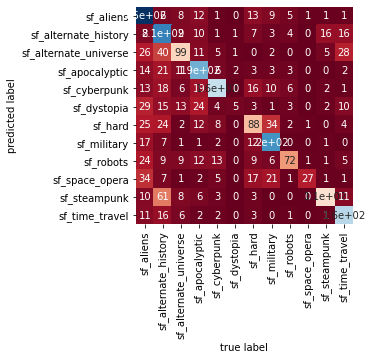

In [17]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False,
xticklabels=['sf_aliens', 'sf_alternate_history', 'sf_alternate_universe',
       'sf_apocalyptic', 'sf_cyberpunk', 'sf_dystopia', 'sf_hard',
       'sf_military', 'sf_robots', 'sf_space_opera', 'sf_steampunk',
       'sf_time_travel'], yticklabels=['sf_aliens', 'sf_alternate_history', 'sf_alternate_universe',
       'sf_apocalyptic', 'sf_cyberpunk', 'sf_dystopia', 'sf_hard',
       'sf_military', 'sf_robots', 'sf_space_opera', 'sf_steampunk',
       'sf_time_travel'])
plt.xlabel('true label')
plt.ylabel('predicted label')

In [18]:
# import lazypredict
# from lazypredict.Supervised import LazyClassifier
# clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
# models,predictions = clf.fit(X_train_cv, X_test_cv, y_train, y_test)

# print(models)